# SSD Mobilenet (640X640) 

This notebook is hightly inspired from [this](https://medium.com/@matus.tanon/custom-object-detection-using-tensorflow-in-google-colab-e4d6e1a17f18) blog.

In [ ]:
# getting GPU info
!nvidia-smi

Tue Feb  2 10:58:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# IMPORTANT : make sure to use Tensorflow version 1.x, now Tensorflow's team updated the API, so it can work with Tensorflow 2.x also
# but here I used Tensorflow 1.x implementation
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# setting path to root
%cd

# inside /root
# cloning Tensorflow's model repository to colab
!git clone https://github.com/tensorflow/models.git

/root
Cloning into 'models'...
remote: Enumerating objects: 51252, done.
remote: Total 51252 (delta 0), reused 0 (delta 0), pack-reused 51252
Receiving objects: 100% (51252/51252), 568.80 MiB | 36.62 MiB/s, done.
Resolving deltas: 100% (34977/34977), done.


In [ ]:
# Check for the current route
!pwd

/root


In [ ]:
# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# Check for the current route
!pwd

/root/models/research
/root/models/research


In [ ]:
# still inside /root/models/research/
# adding libraries to the python path

import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

In [ ]:
# tf_slim necessary to install
!pip install tf_slim

     |████████████████████████████████| 358kB 7.8MB/s 


In [ ]:
# still inside /root/models/research/
# This command is used to just make sure that we correctly installed the Tensorflow object detection API
!python object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_wi

In [ ]:
!pip install lvis

In [ ]:
# copying zip file to google colab

!cp -r '/content/drive/MyDrive/RDD/data.tar.gz' '/root/models/'

In [ ]:
# setting new path
%cd /root/models/

# unzipping the zipped file
!tar -xvf  'data.tar.gz'

Streaming output truncated to the last 5000 lines.
data/images/train/Japan_000829.xml
data/images/train/Japan_008427.xml
data/images/train/Japan_003047.jpg
data/images/train/Japan_012361.jpg
data/images/train/Japan_000291.jpg
data/images/train/India_007122.jpg
data/images/train/Japan_005137.jpg
data/images/train/Japan_001859.jpg
data/images/train/Japan_000577.xml
data/images/train/Japan_010791.jpg
data/images/train/Japan_000484.xml
data/images/train/Japan_000225.jpg
data/images/train/Japan_001364.jpg
data/images/train/Japan_006388.jpg
data/images/train/Japan_012196.xml
data/images/train/Czech_002165.xml
data/images/train/Japan_011783.jpg
data/images/train/Japan_012810.xml
data/images/train/India_006094.jpg
data/images/train/Japan_001065.jpg
data/images/train/Japan_010245.jpg
data/images/train/Czech_000995.xml
data/images/train/Japan_011435.xml
data/images/train/Japan_000889.jpg
data/images/train/Japan_006283.xml
data/images/train/Japan_006561.xml
data/images/train/Czech_003348.xml
data

In [ ]:
# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# still inside /root/models/research/
# adding libraries to the python path
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# setting new path
%cd /root/models/data/

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python xml_to_csv.py -i images/train -o annotations/train_labels.csv -l annotations

# Convert test folder annotation xml files to a single csv.
!python xml_to_csv.py -i images/test -o annotations/test_labels.csv

/root/models/research
/root/models/data
Successfully converted xml to csv.
Generate `annotations/label_map.pbtxt`
Successfully converted xml to csv.


In [ ]:
# getting current directory
!pwd

/root/models/data


The below augumentation steps are inspired from [this](https://github.com/asetkn/Tutorial-Image-and-Multiple-Bounding-Boxes-Augmentation-for-Deep-Learning-in-4-Steps) blog.

In [ ]:
# creating a list of the names of all the train images
train_images = []
for filename in os.listdir("images/train"):
  if filename.split('.')[-1] == 'jpg':
    train_images.append(filename)

print(len(train_images))
print(train_images[:5])

9756
['Japan_001169.jpg', 'India_007734.jpg', 'Japan_007787.jpg', 'Japan_003758.jpg', 'Japan_000540.jpg']


In [ ]:
# creating a list of the names of all the test images
test_images = []
for filename in os.listdir("images/test"):
  if filename.split('.')[-1] == 'jpg':
    test_images.append(filename)

print(len(test_images))
print(test_images[:5])

2439
['India_001030.jpg', 'Czech_001593.jpg', 'Japan_009481.jpg', 'India_003754.jpg', 'Japan_007327.jpg']


In [ ]:
# importing some important libraries
import pandas as pd

import imgaug as ia
ia.seed(1)

import imageio

from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 

import glob
import cv2

In [ ]:
# setting path
%cd /root/models/data/images/train/

# inside /content/object_detection/data/images/train
# checking the shape of a random train_image
image = cv2.imread(train_images[19], cv2.IMREAD_UNCHANGED)
image.shape

/root/models/data/images/train


(600, 600, 3)

In [ ]:
# setting path
%cd /root/models/data/images/test/

# inside /content/object_detection/data/images/test
# checking the shape of a random test_image
image = cv2.imread(test_images[83], cv2.IMREAD_UNCHANGED)
image.shape

/root/models/data/images/test


(600, 600, 3)

In [ ]:
# setting path
%cd /root/models/data/annotations/

# reading train and test labels csv files
train_labels = pd.read_csv('train_labels.csv')
test_labels = pd.read_csv('test_labels.csv')

/root/models/data/annotations


In [ ]:
# start by groupping each image bounding boxes coordinates
# separate dataframes are formed based on the filename
grouped = train_labels.groupby('filename')

# we can pull each group with get_group() using the filename
group_df = grouped.get_group(train_images[3])
group_df = group_df.reset_index()
group_df = group_df.drop(['index'], axis=1)
group_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Japan_003758.jpg,600,600,D40,217,541,295,574
1,Japan_003758.jpg,600,600,D40,571,557,600,585
2,Japan_003758.jpg,600,600,D20,333,556,452,600
3,Japan_003758.jpg,600,600,D20,541,548,591,600
4,Japan_003758.jpg,600,600,D10,113,542,225,561


In [ ]:
# get bounding boxes coordinates from grouped data frame and write into array        
bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
# display the array we've got
bb_array

array([[217, 541, 295, 574],
       [571, 557, 600, 585],
       [333, 556, 452, 600],
       [541, 548, 591, 600],
       [113, 542, 225, 561]])

In [ ]:
# setting path
%cd /root/models/data/images/train/

# inside /root/models/data/images/train/
# reading a random image(3rd train image) as array and getting its shape
img_arr = imageio.imread(train_images[3])
img_arr.shape

/root/models/data/images/train


(600, 600, 3)

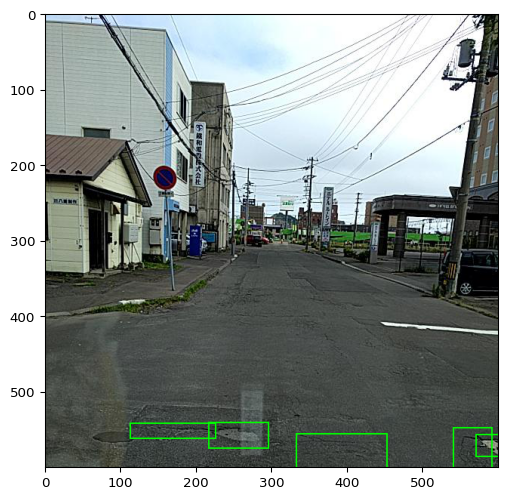

In [ ]:
# passing the array of bounding boxes coordinates to the imgaug library
bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=img_arr.shape)
# display the image and draw bounding boxes
ia.imshow(bbs.draw_on_image(img_arr, size=2))

As we can see it's a 600X600 image with two bouding boxes(possibly two damage types). Now we can use resizing image and bounding box code to perform operations. After that we'll see it again.

In [ ]:
# to resize the images we create two augmenters
# one is used when the image height is more than 640px and the other when the width is more than 640px
height_resize = iaa.Sequential([ 
    iaa.Resize({"height": 640, "width": 'keep-aspect-ratio'})
])

width_resize = iaa.Sequential([ 
    iaa.Resize({"height": 'keep-aspect-ratio', "width": 640})
])

In [ ]:
def bbs_obj_to_df(bbs_object):
  '''
  This function is used to convert BoundingBoxesOnImage object into DataFrame.
  input/parameter : BoundingBoxesOnImage object
  output/return : pandas DataFrame
  '''
  # convert BoundingBoxesOnImage object into array
  bbs_array = bbs_object.to_xyxy_array()
  # convert array into a DataFrame ['xmin', 'ymin', 'xmax', 'ymax'] columns
  df_bbs = pd.DataFrame(bbs_array, columns=['xmin', 'ymin', 'xmax', 'ymax'])
  return df_bbs

In [ ]:
def resize_imgaug(df, images_path, aug_images_path, image_prefix):
    '''
    This function is used to perform actual resizing of image as well as annotations.
    input/parameter : pandas DataFrame, input images path(string), destination images path(string) and image prerix(string)
    output/return : pandas DataFrame
    '''

    # create data frame which we're going to populate with augmented image info
    aug_bbs_xy = pd.DataFrame(columns=
                              ['filename','width','height','class', 'xmin', 'ymin', 'xmax', 'ymax']
                             )
    grouped = df.groupby('filename')    
    
    for filename in df['filename'].unique():
        # getting separate data frame grouped by file name
        group_df = grouped.get_group(filename)
        group_df = group_df.reset_index()
        group_df = group_df.drop(['index'], axis=1)
        
        # The only difference between if and elif statements below is the use of height_resize and width_resize augmentors deffined previously

        # If image height is greater than or equal to image width 
        # AND greater than 300px perform resizing augmentation expand image height to 640px.
        if group_df['height'].unique()[0] >= group_df['width'].unique()[0] and group_df['height'].unique()[0] > 300:
            # read the image
            image = imageio.imread(images_path+filename)
            # get bounding boxes coordinates and write into array        
            bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
            # pass the array of bounding boxes coordinates to the imgaug library
            bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
            # apply augmentation on image and on the bounding boxes
            image_aug, bbs_aug = height_resize(image=image, bounding_boxes=bbs)
            # write augmented image to a file
            imageio.imwrite(aug_images_path+image_prefix+filename, image_aug)  
            # create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)        
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
            # rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
            # create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
            # concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
            # append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])
            
        # if image width is greater than image height 
        # AND greater than 300px perform resizing augmentation expand image width to 640px
        elif group_df['width'].unique()[0] > group_df['height'].unique()[0] and group_df['width'].unique()[0] > 300:
            # read the image
            image = imageio.imread(images_path+filename)
            # get bounding boxes coordinates and write into array        
            bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
            # pass the array of bounding boxes coordinates to the imgaug library
            bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
            # apply augmentation on image and on the bounding boxes
            image_aug, bbs_aug = width_resize(image=image, bounding_boxes=bbs)
            # write augmented image to a file
            imageio.imwrite(aug_images_path+image_prefix+filename, image_aug)  
            # create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)        
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
            # rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
            # create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
            # concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
            # append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])

        # append image info without any changes if it's height and width are both less than 600px 
        else:
            aug_bbs_xy = pd.concat([aug_bbs_xy, group_df])
    
    # turn dataframe with updated images and bounding boxes annotations 
    aug_bbs_xy = aug_bbs_xy.reset_index()
    aug_bbs_xy = aug_bbs_xy.drop(['index'], axis=1)
    return aug_bbs_xy

In [ ]:
%%time
# apply resizing augmentation to our train images and write the updated images and bounding boxes annotations to the DataFrame 
# we will not apply prefix to our files and will overwrite images in the same directory

resized_images_df_train = resize_imgaug(train_labels, '/root/models/data/images/train/', '/root/models/data/images/train/', '')

CPU times: user 6min 21s, sys: 5.04 s, total: 6min 26s
Wall time: 5min 41s


In [ ]:
resized_images_df_train.shape

(19999, 8)

In [ ]:
resized_images_df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Japan_007871.jpg,640,640,D20,9.599999,11.733333,636.799988,411.733337
1,Japan_003136.jpg,640,640,D20,204.799988,330.666656,258.133331,371.199982
2,Japan_003136.jpg,640,640,D00,476.799988,279.466675,552.533325,408.533325
3,Japan_007633.jpg,640,640,D40,522.666687,611.200012,579.199951,640.000000
4,Japan_007633.jpg,640,640,D20,346.666687,490.666656,416.000000,640.000000


In [ ]:
resized_images_df_train.isnull().sum()

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

In [ ]:
%%time
# apply resizing augmentation to our test images and write the updated images and bounding boxes annotations to the DataFrame 
# we will not apply prefix to our files and will overwrite images in the same directory

resized_images_df_test = resize_imgaug(test_labels, '/root/models/data/images/test/', '/root/models/data/images/test/', '')

CPU times: user 1min 34s, sys: 1.28 s, total: 1min 35s
Wall time: 1min 24s


In [ ]:
resized_images_df_test.shape

(5047, 8)

In [ ]:
resized_images_df_test.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,India_003754.jpg,640,640,D20,67.555557,456.000000,640.000000,549.333374
1,Japan_004285.jpg,640,640,D00,266.666656,361.600006,324.266663,487.466675
2,Japan_003888.jpg,640,640,D00,366.933319,388.266663,490.666656,558.933350
3,Japan_003888.jpg,640,640,D10,29.866667,432.000000,482.133331,501.333344
4,Japan_003888.jpg,640,640,D20,186.666656,304.000000,221.866669,343.466675


In [ ]:
resized_images_df_test.isnull().sum()

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
dtype: int64

/root/models/data/images/train


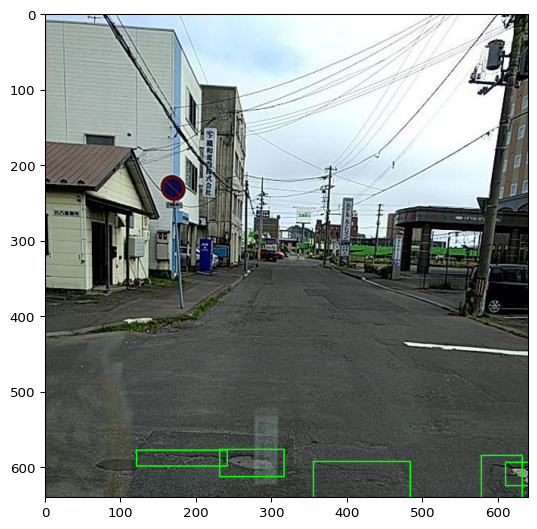

In [ ]:
# checking the bounding boxes for the above defined random image (images[2])

# setting path
%cd /root/models/data/images/train

# inside /root/models/data/images/train
# visualise the resized image with bounding boxes
# to make sure our bounding boxes were resized correctly as well
grouped = resized_images_df_train.groupby('filename')
group_df = grouped.get_group(train_images[3])
group_df = group_df.reset_index()
group_df = group_df.drop(['index'], axis=1)
bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
image = imageio.imread(train_images[3])
bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
ia.imshow(bbs.draw_on_image(image, size=2))

In [ ]:
# setting path
%cd /root/models/data/images/train

# inside /root/models/data/images/train
# just cross checking the shape of above defined train image
image = cv2.imread(train_images[19], cv2.IMREAD_UNCHANGED)
image.shape

/root/models/data/images/train


(640, 640, 3)

In [ ]:
# setting path
%cd /root/models/data/images/test

# inside /root/models/data/images/test
# just cross checking the shape of above defined test image
image = cv2.imread(test_images[83], cv2.IMREAD_UNCHANGED)
image.shape

/root/models/data/images/test


(640, 640, 3)

In [ ]:
# setting path
%cd /root/models/data/annotations

# inside /root/models/data/annotations
# saving newly created csv's to the annotations folder
resized_images_df_train.to_csv('new_train_labels.csv', index=False)
resized_images_df_test.to_csv('new_test_labels.csv', index=False)

/root/models/data/annotations


In [ ]:
# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# still inside /root/models/research/
# adding libraries to the python path
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'


# setting path
%cd /root/models/data/

# inside /root/models/data/
# Generate `train.record`
!python generate_tfrecord.py --csv_input=annotations/new_train_labels.csv --output_path=annotations/train.record --img_path=images/train --label_map annotations/label_map.pbtxt

# Generate `test.record`
!python generate_tfrecord.py --csv_input=annotations/new_test_labels.csv --output_path=annotations/test.record --img_path=images/test --label_map annotations/label_map.pbtxt

/root/models/research
/root/models/data
Successfully created the TFRecords: /root/models/data/annotations/train.record
Successfully created the TFRecords: /root/models/data/annotations/test.record


In [ ]:
# setting path
%cd ~/models

# inside ~/models
# importing some important libraries
import os
import shutil
import glob
import urllib
import tarfile
from requests import get

MODEL = 'ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

# downloading model from Tensorflow
if not (os.path.exists(MODEL_FILE)):
  with open(MODEL_FILE, "wb") as file:
    # get request
    response = get(DOWNLOAD_BASE + MODEL_FILE)
    # write to file
    file.write(response.content)

# extracting downloaded tar model
tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

# saving extracted model to DEST_DIR by replacing existing DEST_DIR
os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/models


In [ ]:
# Move Config file to directory "models"
shutil.move("/root/models/research/object_detection/samples/configs/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config", "/root/models") 

'/root/models/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config'

In [ ]:
# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# still inside /root/models/research/
# adding libraries to the python path
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'


# Edit Pipeline 
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/root/models/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config'
with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/root/models/data/annotations/train.record'] 
pipeline.train_input_reader.label_map_path = '/root/models/data/annotations/label_map.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/root/models/data/annotations/test.record']
pipeline.eval_input_reader[0].label_map_path = '/root/models/data/annotations/label_map.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/root/models/pretrained_model/model.ckpt'
pipeline.train_config.num_steps = 50000
pipeline.train_config.batch_size = 16
pipeline.model.ssd.num_classes = 4
pipeline.eval_config.num_examples = 10

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

/root/models/research


In [ ]:
!cat /root/models/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config

model {
  ssd {
    num_classes: 4
    image_resizer {
      fixed_shape_resizer {
        height: 640
        width: 640
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v1_fpn"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 4e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.01
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.997
          scale: true
          epsilon: 0.001
        }
      }
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_thres

In [ ]:
%%time

# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# still inside /root/models/research/
# adding libraries to the python path
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Begin training
!python /root/models/research/object_detection/model_main.py \
    --logtostderr \
    --pipeline_config_path=/root/models/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config

/root/models/research
W0202 01:28:58.998530 140549896341376 model_lib.py:793] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0202 01:28:58.998729 140549896341376 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0202 01:28:58.998834 140549896341376 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0202 01:28:58.998912 140549896341376 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0202 01:28:58.998985 140549896341376 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0202 01:28:58.999079 140549896341376 model_lib.py:809] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estimator_and_inputs: use_

In [ ]:
!ls /tmp/tmpi8xp2bjz/

checkpoint
eval_0
events.out.tfevents.1612229348.20a0c9a880bd
graph.pbtxt
model.ckpt-11576.data-00000-of-00001
model.ckpt-11576.index
model.ckpt-11576.meta
model.ckpt-11833.data-00000-of-00001
model.ckpt-11833.index
model.ckpt-11833.meta
model.ckpt-12091.data-00000-of-00001
model.ckpt-12091.index
model.ckpt-12091.meta
model.ckpt-12348.data-00000-of-00001
model.ckpt-12348.index
model.ckpt-12348.meta
model.ckpt-12606.data-00000-of-00001
model.ckpt-12606.index
model.ckpt-12606.meta


In [ ]:
# setting new path
%cd /root/models/research/

# inside /root/models/research/
# PROTOBUF compilation
# The Tensorflow Object Detection API uses Protobufs to configure model and training parameters
# Before the framework can be used, the Protobuf libraries must be compiled.
!protoc object_detection/protos/*.proto --python_out=.

# still inside /root/models/research/
# adding libraries to the python path
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# exporting trained model
!python /root/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync.config \
    --output_directory=/root/models/fine_tuned_model \
    --trained_checkpoint_prefix=/tmp/tmpi8xp2bjz/model.ckpt-12606

/root/models/research
Instructions for updating:
Please use `layer.__call__` method instead.
W0202 09:36:15.507256 140265281767296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0202 09:36:18.031242 140265281767296 deprecation.py:323] From /root/models/research/object_detection/core/post_processing.py:601: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
W0202 09:36:18.436737 140265281767296 deprecation.py:323] From /root/models/research/obje

In [ ]:
%cd /root/models/fine_tuned_model/

pb_fname = "frozen_inference_graph.pb"
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

/root/models/fine_tuned_model


In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fname = os.path.basename(pb_fname)
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(pb_fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1vsoDqqjl5m4XKa3RIHrY1jS7dC9pc0o5


That's it for the training part. Since we have a saved model weights graph so we can use it for Inference. So let's move to the **data pipeline** part.